In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import tensorflow as tf
%matplotlib inline

%config InlineBackend.figure_format = "svg"

Importing tensorflow and the necessary libraries 



In [2]:
train_set=pd.read_csv("D:/DataSet/train.csv/train.csv")
test_set=pd.read_csv("D:/DataSet/test.csv/test.csv")

these are our training set and target sets from the Human Activity Recognition Dataset 

In [3]:
print("The training set shape is "+str(train_set.shape))
print("The testing set shape is "+str(test_set.shape))

The training set shape is (7352, 563)
The testing set shape is (2947, 563)


In [4]:
print('The current target data is ',test_set['Activity'].unique() )

The current target data is  ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


The Human Activity Recognition dataset is designed and pooled for these six target classes

In [5]:
pd.crosstab(train_set.subject,train_set.Activity)

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
1,50,47,53,95,49,53
3,62,52,61,58,49,59
5,52,44,56,56,47,47
6,57,55,57,57,48,51
7,52,48,53,57,47,51
8,54,46,54,48,38,41
11,57,53,47,59,46,54
14,51,54,60,59,45,54
15,72,59,53,54,42,48


This shows us the number of observations made by each subject for each target activity in the training set .

TRAINING PHASE:
Separating the X and Y data from the Test_set and Train_set

In [6]:
train_x=np.array(train_set.iloc[:,:-2])
train_y=np.array(train_set.iloc[:,562])
num_labels=6  # target classes

test_x=np.array(test_set.iloc[:,:-2])
test_y=np.array(test_set.iloc[:,562])

print(train_set['Activity'].unique())

['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


The 'y' or outputs , are in text format so we need to convert them into numerical form.

In [7]:
targets=np.unique(train_y)
for i in range(num_labels):
    np.put(train_y,np.where(train_y==targets[i]),i)
train_y=np.eye(num_labels)[train_y.astype('int')]



In [8]:
for i in range(num_labels):
    np.put(test_y,np.where(test_y==targets[i]),i)
test_y=np.eye(num_labels)[test_y.astype(int)]    

Now we have both the test and train outputs 'y' in our desired format.
Now we can shuffle the data .

In [9]:
seed=456 # any seed value 

In [10]:
np.random.seed(seed)
np.random.shuffle(train_x)
np.random.seed(seed)
np.random.shuffle(train_y)

In [11]:
np.random.seed(seed)
np.random.shuffle(test_x)
np.random.seed(seed)
np.random.shuffle(test_y)

SOFT MAX CLASSIFIER : This is the learning model we use now along with Gradient Descent to optimize the weights.

In [12]:
# place holder for x with 561 features 
x=tf.placeholder('float',[None,561],name='x')
# place holder for y (out target) which has 6 of them
y=tf.placeholder('float',[None,6],name='y')


now we define our soft-max classifier function 

In [68]:
def train_softmax(x,learning_rate):
    soft_max_loss=[] # stores the costs or loss for softmax   
    epochList = []
    W=tf.Variable(tf.zeros([561,6]),name="weights")
    b=tf.Variable(tf.zeros([6]),name="biases")
    prediction=tf.nn.softmax(tf.matmul(x,W)+b,name='prediction_op')
    cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=y))
    optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    session=tf.InteractiveSession()
    tf.global_variables_initializer().run()
    for epoch in range(1500):
        loss=0
        _,c=session.run([optimizer,cost],feed_dict={x:train_x,y:train_y})
        loss=+c
        
        if(epoch%100==0 and epoch!=0):
            print('epoch ',epoch,' completed out of ',1500,' Training loss:' ,loss)
            soft_max_loss.append(loss)
            epochList.append(epoch)
            
    correct =tf.equal(tf.argmax(prediction,1),tf.argmax(y,1))
    accuracy=tf.reduce_mean(tf.cast(correct,tf.float32),name='op_accuracy')
    accu=session.run(accuracy,feed_dict={x:test_x,y:test_y})
    print('testing set accuracy is : ',accu)
    return soft_max_loss, epochList,accu    

epoch  100  completed out of  1500  Training loss: 1.2895365
epoch  200  completed out of  1500  Training loss: 1.2457143
epoch  300  completed out of  1500  Training loss: 1.1770562
epoch  400  completed out of  1500  Training loss: 1.1569247
epoch  500  completed out of  1500  Training loss: 1.1473427
epoch  600  completed out of  1500  Training loss: 1.1395111
epoch  700  completed out of  1500  Training loss: 1.1330483
epoch  800  completed out of  1500  Training loss: 1.1274961
epoch  900  completed out of  1500  Training loss: 1.122621
epoch  1000  completed out of  1500  Training loss: 1.1182798
epoch  1100  completed out of  1500  Training loss: 1.1143706
epoch  1200  completed out of  1500  Training loss: 1.110822
epoch  1300  completed out of  1500  Training loss: 1.1075914
epoch  1400  completed out of  1500  Training loss: 1.1046771
testing set accuracy is :  0.95113677
Accuracy is :  0.95113677


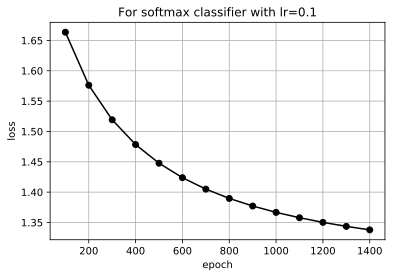

In [72]:
softmax_loss, epochList,accuracy = train_softmax(x,0.25)
plt.figure()
plt.plot(epochList, soft_max_loss,"ko-")
plt.grid(True)
plt.xlabel(r"epoch")
plt.ylabel(r"loss")
str='For softmax classifier with lr=0.25'
plt.title(str)
print("Accuracy is : ",accuracy)

Neural Classifier :  We build a neural network classifier , we first list out the hyper paramneters which we use through out the network.

In [53]:
n_nodes_input = 561 # number of input features
n_classes = 6       # number of activities
x = tf.placeholder('float', [None, 561])
y = tf.placeholder('float')

This is feed forward logic 

In [58]:
def neural_network_model(data,n_nodes_hl):
    # define weights and biases for all each layer
    hidden_layer = {'weights':tf.Variable(tf.truncated_normal([n_nodes_input, n_nodes_hl], stddev=0.3)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[n_nodes_hl]))}
    output_layer = {'weights':tf.Variable(tf.truncated_normal([n_nodes_hl, n_classes], stddev=0.3)),
                    'biases':tf.Variable(tf.constant(0.1, shape=[n_classes]))}
    # feed forward and activations
    l1 = tf.add(tf.matmul(data, hidden_layer['weights']), hidden_layer['biases'])
    l1 = tf.nn.sigmoid(l1)
    output = tf.matmul(l1, output_layer['weights']) + output_layer['biases']
    
    return output

This is the training part of the neural network:


In [59]:
def train_neural_network(x,n_nodes_hl):
    neural_net_loss=[] # to store the loss at epoch
    epoch_count_neural=[]
    prediction = neural_network_model(x,n_nodes_hl)
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=prediction))
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    sess = tf.InteractiveSession() 
    tf.global_variables_initializer().run() #this assigns values 
    for epoch in range(1500):
        loss = 0
        _, c = sess.run([optimizer, cost], feed_dict = {x: train_x, y: train_y})
        loss += c
        if (epoch % 100 == 0 and epoch != 0):
            print('Epoch', epoch, 'completed out of', 1500, 'Training loss:', loss)
            neural_net_loss.append(loss)
            epoch_count_neural.append(epoch)
    correct = tf.equal(tf.argmax(prediction,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name='op_accuracy')
    accu=sess.run(accuracy, feed_dict = {x: test_x, y: test_y})
    print('Testing set Accuracy:', )
    return neural_net_loss,epoch_count_neural,accu

In [60]:
neural_net_loss,epoch_count_neural,accuracy_neural= train_neural_network(x,30)

Epoch 100 completed out of 1500 Training loss: 0.35674262046813965
Epoch 200 completed out of 1500 Training loss: 0.284934401512146
Epoch 300 completed out of 1500 Training loss: 0.23417320847511292
Epoch 400 completed out of 1500 Training loss: 0.1855330467224121
Epoch 500 completed out of 1500 Training loss: 0.15411122143268585
Epoch 600 completed out of 1500 Training loss: 0.13007286190986633
Epoch 700 completed out of 1500 Training loss: 0.10966585576534271
Epoch 800 completed out of 1500 Training loss: 0.09320774674415588
Epoch 900 completed out of 1500 Training loss: 0.07980657368898392
Epoch 1000 completed out of 1500 Training loss: 0.06885304301977158
Epoch 1100 completed out of 1500 Training loss: 0.05998732149600983
Epoch 1200 completed out of 1500 Training loss: 0.05276009812951088
Epoch 1300 completed out of 1500 Training loss: 0.046794794499874115
Epoch 1400 completed out of 1500 Training loss: 0.04182400181889534
Testing set Accuracy: 0.9501188


We get a testing accuracy of 95.69


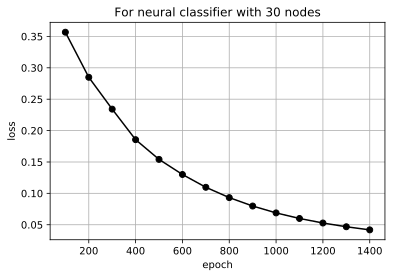

In [62]:
plt.figure
plt.plot(epoch_count_neural,neural_net_loss,"ko-")
plt.grid(True)
plt.xlabel(r"epoch")
plt.ylabel(r"loss")
str='For neural classifier with'+str(n_nodes_hl)+' nodes'
plt.title('For neural classifier with 30 nodes')
print('We get a testing accuracy of ',accuracy_neural)

In [63]:
neural_net_loss,epoch_count_neural,accuracy_neural= train_neural_network(x,40)
# with a different number of nodes 

Epoch 100 completed out of 1500 Training loss: 0.3063209056854248
Epoch 200 completed out of 1500 Training loss: 0.24446718394756317
Epoch 300 completed out of 1500 Training loss: 0.19374865293502808
Epoch 400 completed out of 1500 Training loss: 0.15471325814723969
Epoch 500 completed out of 1500 Training loss: 0.12298504263162613
Epoch 600 completed out of 1500 Training loss: 0.10030756890773773
Epoch 700 completed out of 1500 Training loss: 0.08378700911998749
Epoch 800 completed out of 1500 Training loss: 0.07114201039075851
Epoch 900 completed out of 1500 Training loss: 0.06037016585469246
Epoch 1000 completed out of 1500 Training loss: 0.05207467079162598
Epoch 1100 completed out of 1500 Training loss: 0.045442014932632446
Epoch 1200 completed out of 1500 Training loss: 0.03994794189929962
Epoch 1300 completed out of 1500 Training loss: 0.03541603311896324
Epoch 1400 completed out of 1500 Training loss: 0.0317051075398922
Testing set Accuracy: 0.96097726


Text(0.5,1,'For neural classifier with 40 nodes')

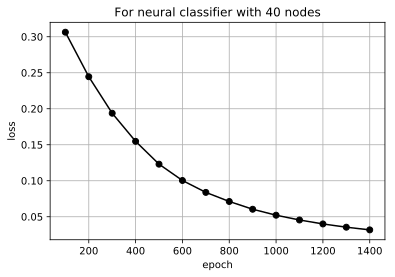

In [64]:
plt.figure
plt.plot(epoch_count_neural,neural_net_loss,"ko-")
plt.grid(True)
plt.xlabel(r"epoch")
plt.ylabel(r"loss")
str='For neural network with'+str(n_nodes_hl)+' nodes'
plt.title(str)
print("Accuracy of this model is :",accuracy_neural)

 ONE VS ALL CLASSIFIER :

This the one vs all classifier which we kind of acts like a binnary classifier but if it takes one class postive then it takes the rest of the classes as negative.

In [73]:
# separating data inputs and output lables 
trainData  = train_set.drop('Activity' , axis=1).values
trainLabel = train_set.Activity.values
testData  = test_set.drop('Activity' , axis=1).values
testLabel = test_set.Activity.values
# encoding labels and preprocessing the data to fit our classifier
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding test labels 
encoder.fit(testLabel)
testLabelE = encoder.transform(testLabel)
encoder.fit(trainLabel)# encoding train labels 
trainLabelE = encoder.transform(trainLabel)


In [78]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=0))
classifier.fit(trainData, trainLabelE)
y_score = classifier.predict_proba(testData)
y_te_pred = classifier.predict(testData)
acc = accuracy_score(testLabelE, y_te_pred)
prec = precision_score(testLabelE, y_te_pred, average="macro")
rec = recall_score(testLabelE, y_te_pred, average="macro")
cfs = confusion_matrix(testLabelE, y_te_pred)
print("Acc: %3.5f, P: %3.5f, R: %3.5f" % (acc, prec, rec))

Acc: 0.96437, P: 0.96695, R: 0.96396


In [79]:
import itertools
# this is the utility function to print the confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[537   0   0   0   0   0]
 [  1 428  57   0   0   5]
 [  0  11 520   1   0   0]
 [  0   0   0 495   0   1]
 [  0   0   0   2 413   5]
 [  0   0   0  21   1 449]]


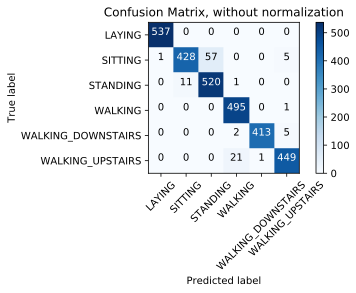

In [81]:
# Plot non-normalized confusion matrix
plt.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs, classes=class_names,title='Confusion Matrix, without normalization')